<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Segment customers of a website - P5</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">| Analysis notebook |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [1]:
## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

## df_analysis
import io
import gc
import timeit
import math
from math import prod
import scipy.stats as stats

## Own specific functions 
# from functions import *

%matplotlib inline
sns.set_theme(style="darkgrid")

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h3>
</div>

In [2]:
def df_analysis(df, name_df, *args, **kwargs):
    """
    Method used to analyze on the DataFrame.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        name_df (str): Dataset name
        
        *args, **kwargs:
        -----------------
            columns (list): Dataframe keys in list format
            flag (str): Flag to show complete information about the dataset to analyse
                        "complete" shows all information about the dataset

    Returns:
    -----------------
        None. 
        Print the analysis on the Dataset. 
    """
    
    # Getting the variables
    columns = kwargs.get("columns", None)
    type_analysis = kwargs.get("type_analysis", None)
    
    ORDERING_COMPLETE = [
        "name", "type", "records", "unique", "# NaN", "% NaN", "mean", "min", "25%", "50%", "75%", "max", "std"
    ]
    
    # Calculating the memory usage based on dataframe.info()
    buf = io.StringIO()
    df.info(buf=buf)
    memory_usage = buf.getvalue().split('\n')[-2]
    
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["name", "type"])
        df_resume["records"] = list(df.count())
        df_resume["# NaN"] = list(df.isnull().sum())
        df_resume["% NaN"] = list(((df.isnull().sum() / len(df.index))*100).round(2))
        
        print("\nAnalysis of", name_df, "dataset")
        print("--------------------------------------------------------------------")
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
                    print("- Total of empty rows:            0")
        print("- Total of empty columns:        ", len(empty_cols))
        print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
                    print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
        print("- Unique indexes:                ", df.index.is_unique)
        
        if columns is not None:
            print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
                print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
            
        if type_analysis == "summarized":
            print("\n")
        
        if type_analysis is None or type_analysis != "summarized":
            pd.set_option("display.max_rows", None) # show full of showing rows
            pd.set_option("display.max_columns", None) # show full of showing cols
            pd.set_option("display.max_colwidth", None) # show full width of showing cols
            pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    
            
            if type_analysis is None or type_analysis != "complete":
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
            elif type_analysis == "complete" and (df.select_dtypes(["int64"]).shape[1] > 0 or df.select_dtypes(["float64"]).shape[1] > 0):
                df_resume["unique"] = list(df.nunique())
                df_desc = pd.DataFrame(df.describe().T).reset_index()
                df_desc = df_desc.rename(columns={"index": "name"})
                df_resume = df_resume.merge(right=df_desc[["name", "mean", "min", "25%", "50%", "75%", "max", "std"]], on="name", how="left")
                df_resume = df_resume[ORDERING_COMPLETE]
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
            
            display(df_resume.sort_values("records", ascending=False))
            
            pd.reset_option("display.max_rows") # reset max of showing rows
            pd.reset_option("display.max_columns") # reset max of showing cols
            pd.reset_option("display.max_colwidth") # reset width of showing cols
            pd.reset_option("display.float_format") # reset show full content in cell
            
        # deleting dataframe to free memory
        if type_analysis == "complete":
            
            if df.select_dtypes(["int64"]).shape[1] > 0 or df.select_dtypes(["float64"]).shape[1] > 0:
                del [[df_resume, df_desc]]
            else:
                del [[df_resume]]
            
            gc.collect()
            df_resume, df_desc = (pd.DataFrame() for i in range(2))
        else:
            del df_resume
            gc.collect()
            df_resume = pd.DataFrame()
            

def normality_test(df):
    """
    Method used to make the normality test.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze

    Returns:
    -----------------
        None. 
        Print the tests on a new Dataset. 
    """
    
    list_test = {
        "Shapiro-Wilk":stats.shapiro, "D’Agostino’s K^2":stats.normaltest,
        "Kolmogorov-Smirnov":stats.kstest
    }
    
    
    alpha = 0.05
    fail_to_reject_H = "Sample looks Gaussian (fail to reject H0)"
    reject_H = "Sample does not look Gaussian (reject H0)"
    
    variable, test_name, result, hypothesis = [[] for i in range(4)]
    
    for key, value in list_test.items():
    
        for col in df.columns:
            
            if df[col].dtypes == "float64" or df[col].dtypes == "int64":
                variable.append(col)
                test_name.append(key)
                
                if key == "Kolmogorov-Smirnov":
                    stat, p_value = value(df[col], cdf="norm")
                else:
                    stat, p_value = value(df[col])
                    
                result.append("Statistics=%.3f, p-value=%.3f" % (stat, p_value))
                hypothesis.append(fail_to_reject_H.translate(SUB)) if p_value > alpha else hypothesis.append(reject_H.translate(SUB))
                
    df_normality_test = pd.DataFrame({
                            "variable": variable,
                            "normality test": test_name, 
                            "result": result,
                            "hypothesis": hypothesis})
    
    display(df_normality_test)

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

In [3]:
df_customers = pd.read_csv(r"datasets\olist_customers_dataset.csv")
df_products = pd.read_csv(r"datasets\olist_products_dataset.csv")
df_product_category_name_translations = pd.read_csv(r"datasets\product_category_name_translation.csv")
df_orders = pd.read_csv(r"datasets\olist_orders_dataset.csv")
df_order_payments = pd.read_csv(r"datasets\olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv(r"datasets\olist_order_reviews_dataset.csv")
df_order_items = pd.read_csv(r"datasets\olist_order_items_dataset.csv")
df_sellers = pd.read_csv(r"datasets\olist_sellers_dataset.csv")
df_geolocation = pd.read_csv(r"datasets\olist_geolocation_dataset.csv")

<div class="alert alert-block alert-info">
    <p>The following description of each dataset, is organized in order of importance</p>
    <ul>
       <li><b>Customer</b> dataset <b>"olist_customers_dataset.csv"</b>.<br>
           Basic customer information
        </li>
       <li><b>Order</b> dataset <b>"olist_orders_dataset.csv"</b>.<br>
           The order header with the order status
        </li>
       <li><b>Product</b> dataset <b>"olist_products_dataset.csv"</b>.<br>
           Product declarative information (category, lenght, weight, etc.)
        </li>
       <li><b>Order Items</b> dataset <b>"olist_orders_dataset.csv"</b>.<br>
           List of products ands sellers related to the order
        </li>
       <li><b>Order Payments</b> dataset <b>"olist_order_payments_dataset.csv"</b>.<br>
           All payments and its methods, related to the order
        </li>
       <li><b>Seller</b> dataset <b>"olist_sellers_dataset.csv"</b>.<br>
           Basic seller information
        </li>
       <li><b>Product Category Translation</b> dataset <b>"product_category_name_translation.csv"</b>.<br>
           Product name translation
        </li>
       <li><b>Order Reviews</b> dataset <b>"olist_order_reviews_dataset.csv"</b>.<br>
           Order reviews
        </li>
       <li><b>Geolocation</b> dataset <b>"olist_order_reviews_dataset.csv"</b>.<br>
           Geolocation data
        </li>
    </ul>
</div>

![Entity relationship diagram](images/entity_relationship.png)

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Initial analysis</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Based on dataset metadata located in <a href="https://www.kaggle.com/olistbr/brazilian-ecommerce", target="blank", style="font-weight: bold;">Kaggle</a>, we are going to see in details, each dataset</p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Customers</h3>
</div>

In [4]:
df_analysis(df_customers, "df_customers", columns=["customer_id", "customer_unique_id"], type_analysis="complete")


Analysis of df_customers dataset
--------------------------------------------------------------------
- Dataset shape:                  99441 rows and 5 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['customer_id', 'customer_unique_id'] is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns      ( memory usage: 3.8+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,customer_id,object,99441,99441,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,customer_unique_id,object,99441,96096,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,customer_zip_code_prefix,int64,99441,14994,0,0.00000,35137.47458,1003.00000,11347.00000,24416.00000,58900.00000,99990.00000,29797.93900
3,customer_city,object,99441,4119,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,customer_state,object,99441,27,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


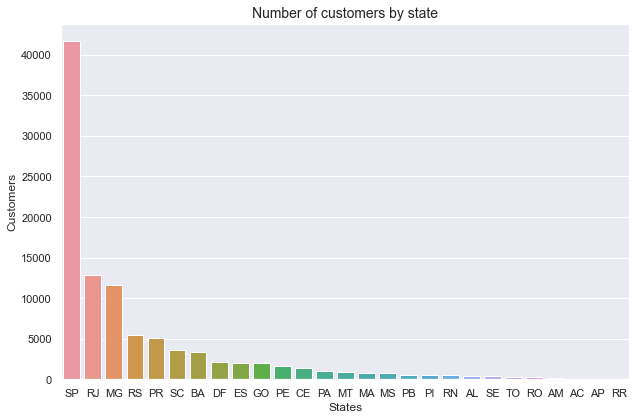

In [6]:
fig = plt.subplots(figsize=(9, 6))
plot = sns.barplot(x=df_customers["customer_state"].value_counts().index, y=df_customers["customer_state"].value_counts(), data=df_customers)
plt.xlabel("States", size=12)
plt.ylabel("Customers", size=12)
plt.title("Number of customers by state", size=14)
plt.tight_layout()
plt.savefig("images/number-of-customer-by-state.png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Dataset with basic information about customer. Below we can see some descriptions about its columns</p>
    <ul>
        <li>customer_unique_id is the pk.</li>
        <li>There is not missing-values</li>
        <li>There are 96096 customers</li>
        <li>There are 14994 zip codes</li>
        <li>There are 4119 cities</li>
        <li>There are 27 states</li>
        <li>SP (Sao Paulo) has twice as many customers as the second state with the most customers </li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Products</h3>
</div>

In [7]:
df_analysis(df_products, "df_products", columns=["product_id"], type_analysis="complete")


Analysis of df_products dataset
--------------------------------------------------------------------
- Dataset shape:                  32951 rows and 9 columns
- Total of NaN values:            2448
- Percentage of NaN:              0.83 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['product_id'] is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns      ( memory usage: 2.3+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,product_id,object,32951,32951,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,product_weight_g,float64,32949,2204,2,0.01000,2276.47249,0.00000,300.00000,700.00000,1900.00000,40425.00000,4282.03873
6,product_length_cm,float64,32949,99,2,0.01000,30.81508,7.00000,18.00000,25.00000,38.00000,105.00000,16.91446
7,product_height_cm,float64,32949,102,2,0.01000,16.93766,2.00000,8.00000,13.00000,21.00000,105.00000,13.63755
8,product_width_cm,float64,32949,95,2,0.01000,23.19673,6.00000,15.00000,20.00000,30.00000,118.00000,12.07905
1,product_category_name,object,32341,73,610,1.85000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,product_name_lenght,float64,32341,66,610,1.85000,48.47695,5.00000,42.00000,51.00000,57.00000,76.00000,10.24574
3,product_description_lenght,float64,32341,2960,610,1.85000,771.49528,4.00000,339.00000,595.00000,972.00000,3992.00000,635.11522
4,product_photos_qty,float64,32341,19,610,1.85000,2.18899,1.00000,1.00000,1.00000,3.00000,20.00000,1.73677


In [8]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<div class="alert alert-block alert-info">
    <p>We are going to merge the products datasets with products translations dataset</p>
</div>

In [9]:
df_product_category_name_translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
df_products = df_products.merge(right=df_product_category_name_translations[["product_category_name", "product_category_name_english"]], on="product_category_name", how="left")

In [11]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [12]:
print("Number of \"products categories\" to complete with \"products categories translated\" is:",
        df_products[(df_products["product_category_name"].isna()) & (df_products["product_category_name_english"].notnull())].shape[0]
)

Number of "products categories" to complete with "products categories translated" is: 0


In [13]:
print("Number of \"products categories translated\" to complete with \"products categories\" is:",
        df_products[(df_products["product_category_name_english"].isna()) & (df_products["product_category_name"].notnull())].shape[0]
)

Number of "products categories translated" to complete with "products categories" is: 13


<div class="alert alert-block alert-info">
    <p>Fill products categories translated with the original name of category</p>
</div>

In [14]:
df_products["product_category_name_english"].fillna(df_products["product_category_name"], inplace=True)

In [15]:
print("Number of \"products categories translated\" to complete with \"products categories\" is:",
        df_products[(df_products["product_category_name_english"].isna()) & (df_products["product_category_name"].notnull())].shape[0]
)

Number of "products categories translated" to complete with "products categories" is: 0


In [16]:
del df_products["product_category_name"]

<div class="alert alert-block alert-info">
    <p>Identifying the categories with more products</p>
</div>

In [17]:
df_number_products_category = pd.DataFrame(df_products.groupby(["product_category_name_english"])["product_id"].count().sort_values(ascending=False).head(20)).reset_index()

In [18]:
df_number_products_category.head()

,product_category_name_english,product_id
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335


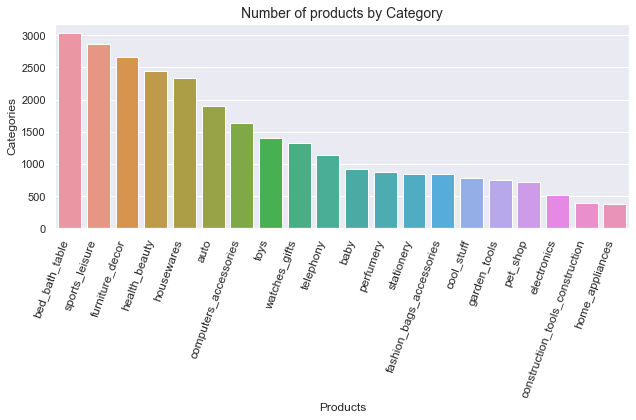

In [19]:
fig = plt.subplots(figsize=(9, 6))
plot = sns.barplot(x=df_number_products_category["product_category_name_english"], y=df_number_products_category["product_id"], data=df_number_products_category)

plot.set_xticklabels(labels=df_number_products_category["product_category_name_english"], rotation=70, size=12, horizontalalignment="right")
plt.xlabel("Products", size=12)
plt.ylabel("Categories", size=12)
plt.title("Number of products by Category", size=14)
plt.tight_layout()
plt.savefig("images/number-of-products-by-category.png")
plt.show()

In [20]:
df_correlation_matrix = pd.DataFrame(df_products.corr()).round(2)

In [21]:
mask = np.zeros_like(df_correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True 

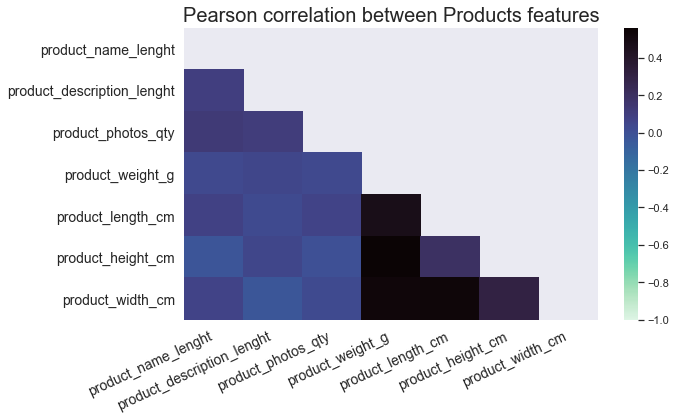

In [22]:
plt.figure(figsize=(10,6))
plt.title("Pearson correlation between Products features", size=20)

ax = sns.heatmap(df_correlation_matrix, mask=mask, vmin=-1, cmap="mako_r")

plt.xticks(rotation=25, size=14, horizontalalignment="right")
plt.yticks(rotation=0, size=14)
plt.tight_layout()
plt.savefig("images/pearson-correlation-between-products-features.png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Dataset with information about products. Below we can see some descriptions about its columns</p>
    <ul>
        <li>product_id is the pk.</li>
        <li>There are some missing-values</li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.3. Orders</h3>
</div>

In [23]:
df_analysis(df_orders, "df_orders", columns=["order_id"], type_analysis="complete")


Analysis of df_orders dataset
--------------------------------------------------------------------
- Dataset shape:                  99441 rows and 8 columns
- Total of NaN values:            4908
- Percentage of NaN:              0.62 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['order_id'] is not present multiple times in the dataframe.
  It CAN be used as a primary key.


,name,type,records,# NaN,% NaN
0,order_id,object,99441,0,0.00000
1,customer_id,object,99441,0,0.00000
2,order_status,object,99441,0,0.00000
3,order_purchase_timestamp,object,99441,0,0.00000
7,order_estimated_delivery_date,object,99441,0,0.00000
4,order_approved_at,object,99281,160,0.16000
5,order_delivered_carrier_date,object,97658,1783,1.79000
6,order_delivered_customer_date,object,96476,2965,2.98000


In [24]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<div class="alert alert-block alert-info">
    <p>Analyzing the <b>order status</b></p>
</div>

In [25]:
df_orders["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [26]:
data_piechart = df_orders["order_status"].sort_values(ascending=False).value_counts().values
labels_piechart = df_orders["order_status"].sort_values(ascending=False).value_counts().index.tolist()
textprops = dict(size=16, color="gray")
colors = ["#5975A4", "#CC8963", "#5F9E6E", "#AD5B5E", "#857AAB", "#7D6D5F", "#D095BF", "#C1B37F"]
explode = (0, 0, 0, 0, 0, 0, 0, 0)

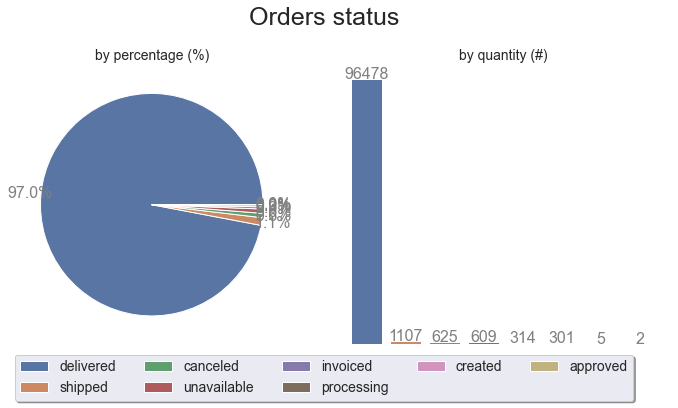

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[10,5])

fig.suptitle("Orders status", size=25)

for lb, data, color in zip(labels_piechart, data_piechart, colors):
    ax2.bar(lb, data, label=lb, color=color)
for index, data in enumerate(data_piechart):
    plt.text(x=index, y=data+1 , s=f"{data}", horizontalalignment="center", fontdict=dict(fontsize=16, color="gray"))
ax2.set_title("by quantity (#)", fontsize=14)
ax2.axis('off')

ax1.pie(x=data_piechart, explode=explode, autopct="%1.1f%%", pctdistance=1.10, 
        textprops=textprops, colors=[color for color in colors], startangle=0)
ax1.set_title("by percentage (%)", fontsize=14)

fig.legend(labels_piechart, loc="center", ncol=5, fontsize=14, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

plt.tight_layout()
plt.savefig("images/orders-status.png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Dataset with order status information. We can say that it is the order header</p>
    <ul>
        <li>order_id can be used as pk.</li>
        <li>There are missing-values in fields related to delivery</li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.3.1. Orders payments</h4>
</div>

In [28]:
df_analysis(df_order_payments, "df_order_payments", columns=["order_id"], type_analysis="complete")


Analysis of df_order_payments dataset
--------------------------------------------------------------------
- Dataset shape:                  103886 rows and 5 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['order_id'] is present multiple times in the dataframe.
  It CANNOT be used as a primary key.

- Type object and records by columns      ( memory usage: 4.0+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,order_id,object,103886,99440,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,payment_sequential,int64,103886,29,0,0.00000,1.09268,1.00000,1.00000,1.00000,1.00000,29.00000,0.70658
2,payment_type,object,103886,5,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,payment_installments,int64,103886,24,0,0.00000,2.85335,0.00000,1.00000,1.00000,4.00000,24.00000,2.68705
4,payment_value,float64,103886,29077,0,0.00000,154.10038,0.00000,56.79000,100.00000,171.83750,13664.08000,217.49406


In [29]:
df_order_payments[df_order_payments.duplicated(subset=["order_id"], keep=False)].head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
35,b2bb080b6bc860118a246fd9b6fad6da,1,credit_card,1,173.84
75,3689194c14ad4e2e7361ebd1df0e77b0,2,voucher,1,57.53
84,723e462ce1ee50e024887c0b403130f3,1,credit_card,1,13.80
102,21b8b46679ea6482cbf911d960490048,2,voucher,1,43.12
121,ea9184ad433a404df1d72fa0a8764232,4,voucher,1,22.49
139,82ffe097d8ddbf319a523b9bbe7725d5,2,voucher,1,30.00
161,c61e3efc183db6b89f5556efb5aa8797,1,credit_card,1,45.50
164,487c1451b8fd7347d0e80e5aca887e91,2,voucher,1,30.00
166,65c863d90026e9dd4888e28d2135c983,2,voucher,1,50.00


In [30]:
df_order_payments[df_order_payments["order_id"] == "ea9184ad433a404df1d72fa0a8764232"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
121,ea9184ad433a404df1d72fa0a8764232,4,voucher,1,22.49
40168,ea9184ad433a404df1d72fa0a8764232,1,credit_card,1,17.78
78613,ea9184ad433a404df1d72fa0a8764232,3,voucher,1,22.49
94151,ea9184ad433a404df1d72fa0a8764232,2,voucher,1,22.49
99425,ea9184ad433a404df1d72fa0a8764232,5,voucher,1,22.47


<div class="alert alert-block alert-info">
    <p>Analyzing the <b>payment methods</b></p>
</div>

In [31]:
df_order_payments["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [32]:
data_piechart = df_order_payments["payment_type"].sort_values(ascending=False).value_counts().values
labels_piechart = df_order_payments["payment_type"].sort_values(ascending=False).value_counts().index.tolist()
textprops = dict(size=16, color="gray")
colors = ["#5975A4", "#CC8963", "#5F9E6E", "#AD5B5E", "#857AAB"]
explode = (0, 0, 0, 0, 0)

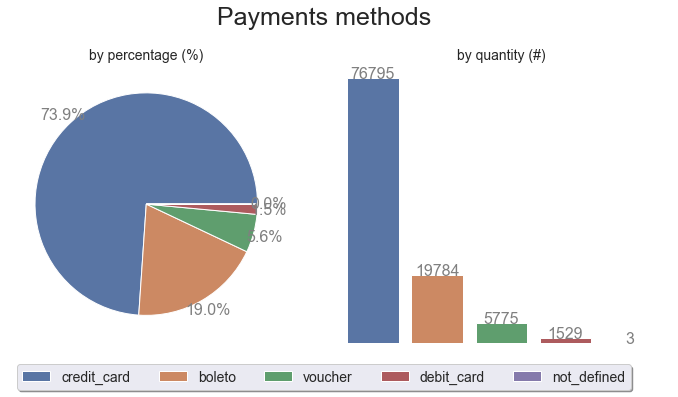

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[10,5])

fig.suptitle("Payments methods", size=25)

for lb, data, color in zip(labels_piechart, data_piechart, colors):
    ax2.bar(lb, data, label=lb, color=color)
for index, data in enumerate(data_piechart):
    plt.text(x=index, y=data+1 , s=f"{data}", horizontalalignment="center", fontdict=dict(fontsize=16, color="gray"))
ax2.set_title("by quantity (#)", fontsize=14)
ax2.axis('off')

ax1.pie(x=data_piechart, explode=explode, autopct="%1.1f%%", pctdistance=1.10, 
        textprops=textprops, colors=[color for color in colors], startangle=0)
ax1.set_title("by percentage (%)", fontsize=14)

fig.legend(labels_piechart, loc="center", ncol=5, fontsize=14, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

plt.tight_layout()
plt.savefig("images/Payments-methods.png")
plt.show()

<div class="alert alert-block alert-info">
    <p>Analyzing the <b>payment values</b></p>
</div>

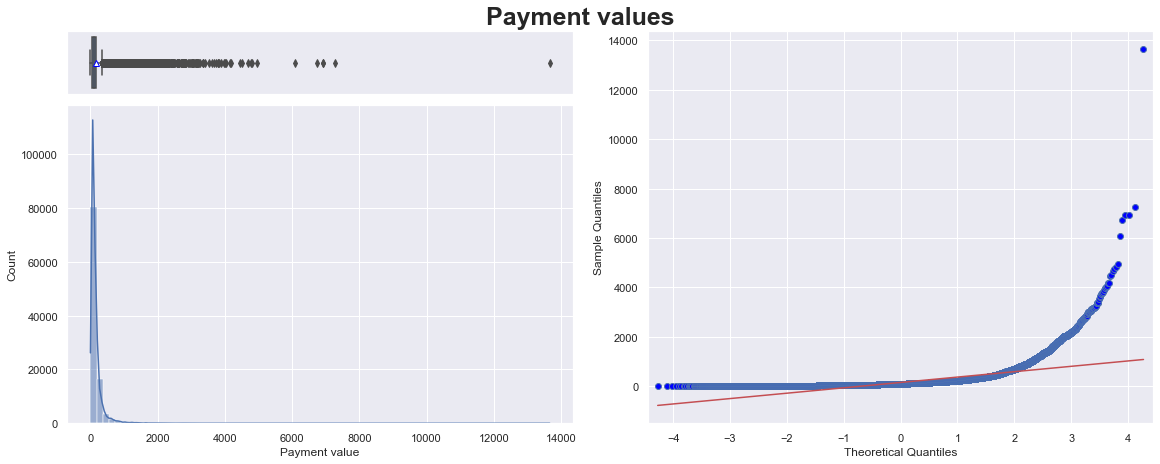


Making the Normality Test
---------------------------------


C:\Users\Samir\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,variable,normality test,result,hypothesis
0,payment_value,Shapiro-Wilk,"Statistics=0.478, p-value=0.000",Sample does not look Gaussian (reject H₀)
1,payment_value,D’Agostino’s K^2,"Statistics=159622.787, p-value=0.000",Sample does not look Gaussian (reject H₀)
2,payment_value,Kolmogorov-Smirnov,"Statistics=0.994, p-value=0.000",Sample does not look Gaussian (reject H₀)


In [34]:
fig = plt.figure(constrained_layout=True, figsize=[16,6])
fig.suptitle("Payment values", size=25, fontweight="bold", y=1.05)
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1], height_ratios=[1, 5])

ax_box = fig.add_subplot(spec[0, 0])
ax_hist = fig.add_subplot(spec[1, 0])
ax_qqplot = fig.add_subplot(spec[:, 1])

# Boxplot
boxplot = sns.boxplot(data=df_order_payments, x=df_order_payments["payment_value"], showmeans=True, ax=ax_box,
                      meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
ax_box.set(xlabel="", xticks=[])
ax_box.set(yticks=[])
boxplot.set_title("")

# Histplot
sns.histplot(data=df_order_payments, x=df_order_payments["payment_value"], bins=75,  kde=True,  ax=ax_hist)
ax_hist.set(xlabel="Payment value")

# QQplot
qqplot(df_order_payments["payment_value"], line='s', ax=ax_qqplot)

plt.savefig("images/qqplot-of-payment-values.png")
plt.show()

print("\nMaking the Normality Test")
print("---------------------------------")
normality_test(df_order_payments[["payment_value"]])
print("\n")

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Dataset with details of order payments. The customer can puy the same order through several  payment methods</p>
    <ul>
        <li>The same order can have differents payments methods</li>
        <li>The payments values doesn't have a normal distribution</li>
        <li>There is not a pk</li>
        <li>There are not missing-values</li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.3.2. Orders reviews</h4>
</div>

In [35]:
df_analysis(df_order_reviews, "df_order_reviews", columns=["review_id"], type_analysis="complete")


Analysis of df_order_reviews dataset
--------------------------------------------------------------------
- Dataset shape:                  100000 rows and 7 columns
- Total of NaN values:            146532
- Percentage of NaN:              20.93 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['review_id'] is present multiple times in the dataframe.
  It CANNOT be used as a primary key.

- Type object and records by columns      ( memory usage: 5.3+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,review_id,object,100000,99173,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,order_id,object,100000,99441,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,review_score,int64,100000,5,0,0.00000,4.07089,1.00000,4.00000,5.00000,5.00000,5.00000,1.35966
5,review_creation_date,object,100000,637,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,review_answer_timestamp,object,100000,99010,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,review_comment_message,object,41753,36921,58247,58.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,review_comment_title,object,11715,4600,88285,88.28000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_order_reviews[df_order_reviews.duplicated(subset=["order_id"], keep=False) & df_order_reviews["review_comment_message"].notnull()].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1063,9c0ff4d25d28bd004057ce16540abc3d,45390ff93f092f0de1524d486a172c33,1,NaN,A mercadoria não foi entregue ainda..,2018-03-21 00:00:00,2018-03-26 22:01:59
1119,c8d187a7c6b2a9ae76018912fc5711c3,0e457aee274ec7e2e18d25ab6d212921,5,NaN,O produto é muito lindo e está com preço excel...,2018-01-01 00:00:00,2018-01-03 14:46:29
1612,b06f6882b1c0bc82ddf057b58b86fe50,2daee070f2042c8b7a8e9fdde778a31a,5,Muito bom,"Ótimo, excelente produto recomendo a todos",2018-07-12 00:00:00,2018-07-13 10:49:12
1983,a59277055ee75dc9a536fd48e9c2946e,f0fbc60d51bb40c156688d9ce008237f,2,NaN,Foi entregue uma quantidade do produto. Sendo ...,2018-01-31 00:00:00,2018-02-01 13:52:17
2000,03a6a25db577d0689440933055111897,2acfdc5131ff2cf4433e668454c9784c,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18


In [37]:
df_order_reviews.loc[df_order_reviews["order_id"] == "0e457aee274ec7e2e18d25ab6d212921"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,c8d187a7c6b2a9ae76018912fc5711c3,0e457aee274ec7e2e18d25ab6d212921,5,NaN,O produto é muito lindo e está com preço excel...,2018-01-01 00:00:00,2018-01-03 14:46:29
90279,58b4629d5cf0507f7f8b9ae84c146544,0e457aee274ec7e2e18d25ab6d212921,5,NaN,"Excelente qualidade dos adesivos, entrega supe...",2018-01-04 00:00:00,2018-01-04 17:40:42


In [38]:
df_order_reviews[df_order_reviews.duplicated(subset=["review_id"], keep=False) & df_order_reviews["review_comment_message"].notnull()].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
348,f4d74b17cd63ee35efa82cd2567de911,f269e83a82f64baa3de97c2ebf3358f6,3,NaN,"A embalagem deixou a desejar, por pouco o prod...",2018-01-12 00:00:00,2018-01-13 18:46:10
837,6ec93e77f444e0b1703740a69122e35d,d8cbc79d1dd84f3c87cb2ca7663c930e,5,NaN,Vendedor compromisso do vou o cliente,2017-10-07 00:00:00,2017-10-07 19:47:11
992,1f5aa5d7c3ee7895e4d223797b5a5f2d,c79bdf061e22288609201ec60deb42fb,5,NaN,Tudo ocorreu de forma eficiente,2017-05-10 00:00:00,2017-05-12 00:58:11
1016,3242cc306a9218d0377831e175d62fbf,711246846695fa895c1776f0ddc30b20,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
1489,b703764760e6e5d534a8940a12fca101,2b49d60af10ea7e2443376987ec8a184,1,NaN,Só veio uma capa comprei 3 aí paguei. Mais de ...,2017-04-11 00:00:00,2017-04-14 11:02:46


In [39]:
df_order_reviews.loc[df_order_reviews["review_id"] == "f4d74b17cd63ee35efa82cd2567de911"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
348,f4d74b17cd63ee35efa82cd2567de911,f269e83a82f64baa3de97c2ebf3358f6,3,NaN,"A embalagem deixou a desejar, por pouco o prod...",2018-01-12 00:00:00,2018-01-13 18:46:10
91014,f4d74b17cd63ee35efa82cd2567de911,a60c9bf6dcdd39e9f1c10ae5ad77c24d,3,NaN,"A embalagem deixou a desejar, por pouco o prod...",2018-01-12 00:00:00,2018-01-13 18:46:10


<div class="alert alert-block alert-info">
    <p>Analyzing the <b>reviews scores</b></p>
</div>

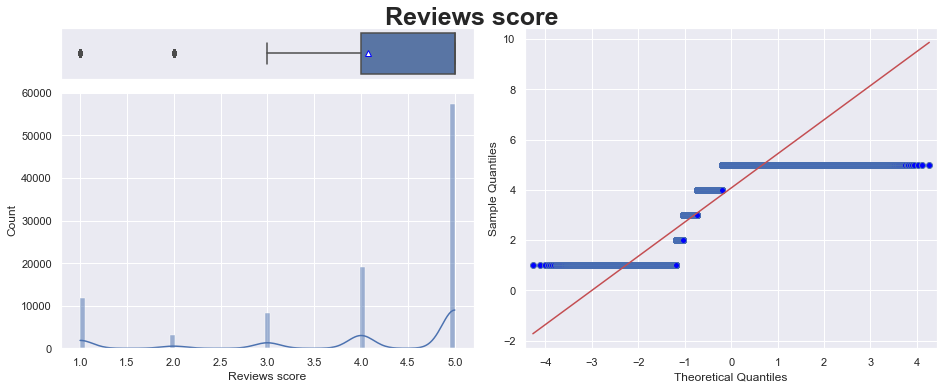


Making the Normality Test
---------------------------------


C:\Users\Samir\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,variable,normality test,result,hypothesis
0,review_score,Shapiro-Wilk,"Statistics=0.693, p-value=0.000",Sample does not look Gaussian (reject H₀)
1,review_score,D’Agostino’s K^2,"Statistics=18404.242, p-value=0.000",Sample does not look Gaussian (reject H₀)
2,review_score,Kolmogorov-Smirnov,"Statistics=0.859, p-value=0.000",Sample does not look Gaussian (reject H₀)


In [40]:
fig = plt.figure(constrained_layout=True, figsize=[13,5])
fig.suptitle("Reviews score", size=25, fontweight="bold", y=1.05)
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1], height_ratios=[1, 5])

ax_box = fig.add_subplot(spec[0, 0])
ax_hist = fig.add_subplot(spec[1, 0])
ax_qqplot = fig.add_subplot(spec[:, 1])

# Boxplot
boxplot = sns.boxplot(data=df_order_reviews, x=df_order_reviews["review_score"], showmeans=True, ax=ax_box,
                      meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
ax_box.set(xlabel="", xticks=[])
ax_box.set(yticks=[])
boxplot.set_title("")

# Histplot
sns.histplot(data=df_order_reviews, x=df_order_reviews["review_score"], bins=75,  kde=True,  ax=ax_hist)
ax_hist.set(xlabel="Reviews score")

# QQplot
qqplot(df_order_reviews["review_score"], line='s', ax=ax_qqplot)

plt.savefig("images/qqplot-of-orders-reviews.png")
plt.show()

print("\nMaking the Normality Test")
print("---------------------------------")
normality_test(df_order_reviews[["review_score"]])
print("\n")

In [41]:
data_piechart = df_order_reviews["review_score"].sort_values(ascending=False).value_counts().values
labels_piechart = df_order_reviews["review_score"].sort_values(ascending=False).value_counts().index.tolist()
textprops = dict(size=16, color="gray")
colors = ["#5975A4", "#CC8963", "#5F9E6E", "#AD5B5E", "#857AAB"]
explode = (0, 0, 0, 0, 0)

In [42]:
labels_piechart = ["Five", "Four", "Three", "Two", "One"]

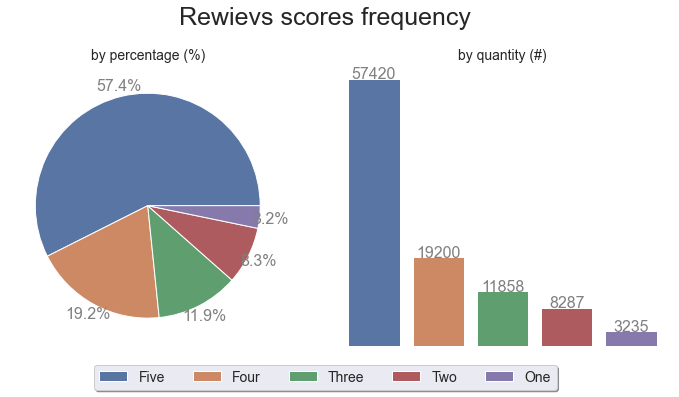

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[10,5])

fig.suptitle("Rewievs scores frequency", size=25)

for lb, data, color in zip(labels_piechart, data_piechart, colors):
    ax2.bar(lb, data, label=lb, color=color)
for index, data in enumerate(data_piechart):
    plt.text(x=index, y=data+1 , s=f"{data}", horizontalalignment="center", fontdict=dict(fontsize=16, color="gray"))
ax2.set_title("by quantity (#)", fontsize=14)
ax2.axis('off')

ax1.pie(x=data_piechart, explode=explode, autopct="%1.1f%%", pctdistance=1.10, 
        textprops=textprops, colors=[color for color in colors], startangle=0)
ax1.set_title("by percentage (%)", fontsize=14)

fig.legend(labels_piechart, loc="center", ncol=5, fontsize=14, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

plt.tight_layout()
plt.savefig("images/Orders-reviews.png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Dataset with order reviews. It seems there are reviews repeated for differentes orders</p>
    <ul>
        <li>There is not a pk</li>
        <li>There are missing-values</li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.3.2. Orders Items</h4>
</div>

In [44]:
df_analysis(df_order_items, "df_order_items", columns=["order_id", "order_item_id"],  type_analysis="complete")


Analysis of df_order_items dataset
--------------------------------------------------------------------
- Dataset shape:                  112650 rows and 7 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['order_id', 'order_item_id'] is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns      ( memory usage: 6.0+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,order_id,object,112650,98666,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,order_item_id,int64,112650,21,0,0.00000,1.19783,1.00000,1.00000,1.00000,1.00000,21.00000,0.70512
2,product_id,object,112650,32951,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,seller_id,object,112650,3095,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,shipping_limit_date,object,112650,93318,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,price,float64,112650,5968,0,0.00000,120.65374,0.85000,39.90000,74.99000,134.90000,6735.00000,183.63393
6,freight_value,float64,112650,6999,0,0.00000,19.99032,0.00000,13.08000,16.26000,21.15000,409.68000,15.80641


In [45]:
df_order_items.sort_values("order_id").head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [46]:
df_order_items[df_order_items["order_id"] == "00143d0f86d6fbd9f9b38ab440ac16f5"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


<div class="alert alert-block alert-info">
    <p>Analyzing the <b>prices</b></p>
</div>

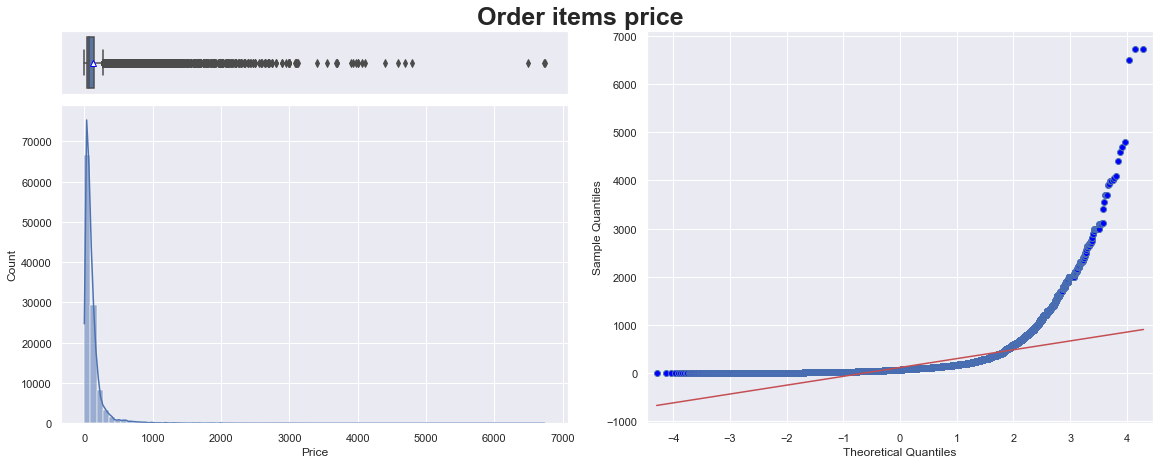


Making the Normality Test
---------------------------------


C:\Users\Samir\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,variable,normality test,result,hypothesis
0,price,Shapiro-Wilk,"Statistics=0.460, p-value=0.000",Sample does not look Gaussian (reject H₀)
1,price,D’Agostino’s K^2,"Statistics=155820.644, p-value=0.000",Sample does not look Gaussian (reject H₀)
2,price,Kolmogorov-Smirnov,"Statistics=1.000, p-value=0.000",Sample does not look Gaussian (reject H₀)


In [47]:
fig = plt.figure(constrained_layout=True, figsize=[16,6])
fig.suptitle("Order items price", size=25, fontweight="bold", y=1.05)
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1], height_ratios=[1, 5])

ax_box = fig.add_subplot(spec[0, 0])
ax_hist = fig.add_subplot(spec[1, 0])
ax_qqplot = fig.add_subplot(spec[:, 1])

# Boxplot
boxplot = sns.boxplot(data=df_order_items, x=df_order_items["price"], showmeans=True, ax=ax_box,
                      meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
ax_box.set(xlabel="", xticks=[])
ax_box.set(yticks=[])
boxplot.set_title("")

# Histplot
sns.histplot(data=df_order_items, x=df_order_items["price"], bins=75,  kde=True,  ax=ax_hist)
ax_hist.set(xlabel="Price")

# QQplot
qqplot(df_order_items["price"], line='s', ax=ax_qqplot)

# plt.savefig("images/qqplot-of-payment-values.png")
plt.show()

print("\nMaking the Normality Test")
print("---------------------------------")
normality_test(df_order_items[["price"]])
print("\n")

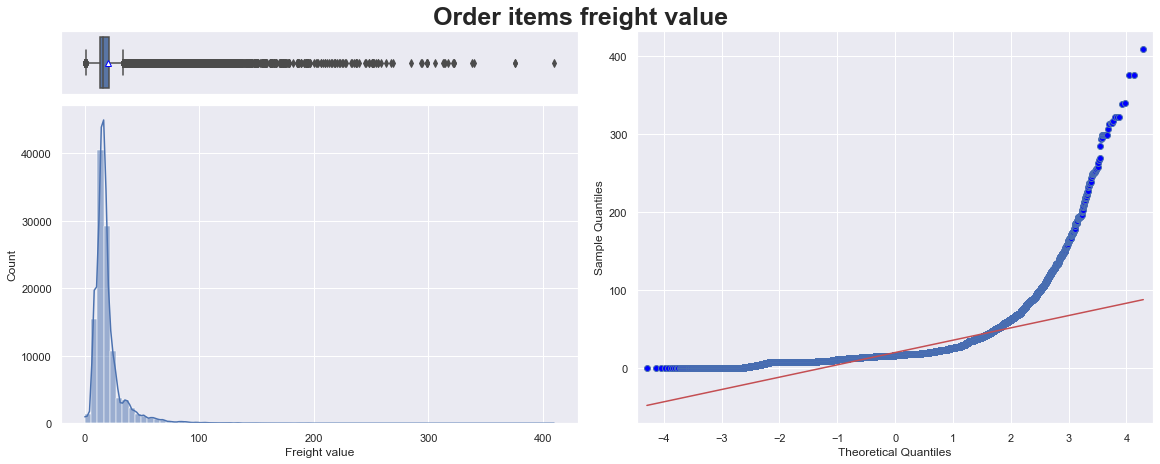


Making the Normality Test
---------------------------------


C:\Users\Samir\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,variable,normality test,result,hypothesis
0,freight_value,Shapiro-Wilk,"Statistics=0.585, p-value=0.000",Sample does not look Gaussian (reject H₀)
1,freight_value,D’Agostino’s K^2,"Statistics=125681.387, p-value=0.000",Sample does not look Gaussian (reject H₀)
2,freight_value,Kolmogorov-Smirnov,"Statistics=0.992, p-value=0.000",Sample does not look Gaussian (reject H₀)


In [48]:
fig = plt.figure(constrained_layout=True, figsize=[16,6])
fig.suptitle("Order items freight value", size=25, fontweight="bold", y=1.05)
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1], height_ratios=[1, 5])

ax_box = fig.add_subplot(spec[0, 0])
ax_hist = fig.add_subplot(spec[1, 0])
ax_qqplot = fig.add_subplot(spec[:, 1])

# Boxplot
boxplot = sns.boxplot(data=df_order_items, x=df_order_items["freight_value"], showmeans=True, ax=ax_box,
                      meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
ax_box.set(xlabel="", xticks=[])
ax_box.set(yticks=[])
boxplot.set_title("")

# Histplot
sns.histplot(data=df_order_items, x=df_order_items["freight_value"], bins=75,  kde=True,  ax=ax_hist)
ax_hist.set(xlabel="Freight value")

# QQplot
qqplot(df_order_items["freight_value"], line='s', ax=ax_qqplot)

# plt.savefig("images/qqplot-of-payment-values.png")
plt.show()

print("\nMaking the Normality Test")
print("---------------------------------")
normality_test(df_order_items[["freight_value"]])
print("\n")

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Dataset with order products </p>
    <ul>
        <li>order_id together with order_item_id, can be used as pk.<br> It is necessary to consider that a customer can buy the same product several times in the same order</li>
        <li>There are not missing-values</li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.4. Sellers</h3>
</div>

In [49]:
df_analysis(df_sellers, "df_sellers", columns=["seller_id"], type_analysis="complete")


Analysis of df_sellers dataset
--------------------------------------------------------------------
- Dataset shape:                  3095 rows and 4 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['seller_id'] is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns      ( memory usage: 96.8+ KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,seller_id,object,3095,3095,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,seller_zip_code_prefix,int64,3095,2246,0,0.00000,32291.05945,1001.00000,7093.50000,14940.00000,64552.50000,99730.00000,32713.45383
2,seller_city,object,3095,611,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,seller_state,object,3095,23,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


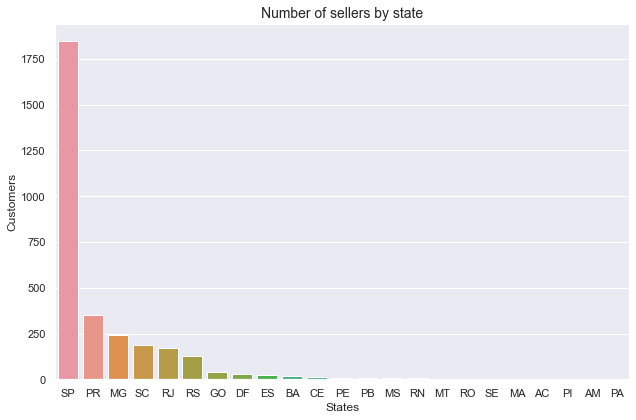

In [51]:
fig = plt.subplots(figsize=(9, 6))
plot = sns.barplot(x=df_sellers["seller_state"].value_counts().index, y=df_sellers["seller_state"].value_counts(), data=df_sellers)
plt.xlabel("States", size=12)
plt.ylabel("Customers", size=12)
plt.title("Number of sellers by state", size=14)
plt.tight_layout()
plt.savefig("images/number-of-sellers-by-state.png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Dataset with basic information about sellers. This table shares almost the same attributes as customer's dataset</p>
    <ul>
        <li>seller_id can be used as pk.</li>
        <li>There is not missing-values</li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.4. Geolocation</h3>
</div>

In [52]:
df_analysis(df_geolocation, "df_geolocation", columns=["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], type_analysis="complete")


Analysis of df_geolocation dataset
--------------------------------------------------------------------
- Dataset shape:                  1000163 rows and 5 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  261831
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'] is present multiple times in the dataframe.
  It CANNOT be used as a primary key.

- Type object and records by columns      ( memory usage: 38.2+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,geolocation_zip_code_prefix,int64,1000163,19015,0,0.00000,36574.16647,1001.00000,11075.00000,26530.00000,63504.00000,99990.00000,30549.33571
1,geolocation_lat,float64,1000163,717360,0,0.00000,-21.17615,-36.60537,-23.60355,-22.91938,-19.97962,45.06593,5.71587
2,geolocation_lng,float64,1000163,717613,0,0.00000,-46.39054,-101.46677,-48.57317,-46.63788,-43.76771,121.10539,4.26975
3,geolocation_city,object,1000163,8011,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,geolocation_state,object,1000163,27,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_geolocation.sort_values("geolocation_zip_code_prefix").head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1246,1001,-23.549292,-46.633559,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
1182,1001,-23.549779,-46.633957,sao paulo,SP
1435,1001,-23.549292,-46.633559,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP


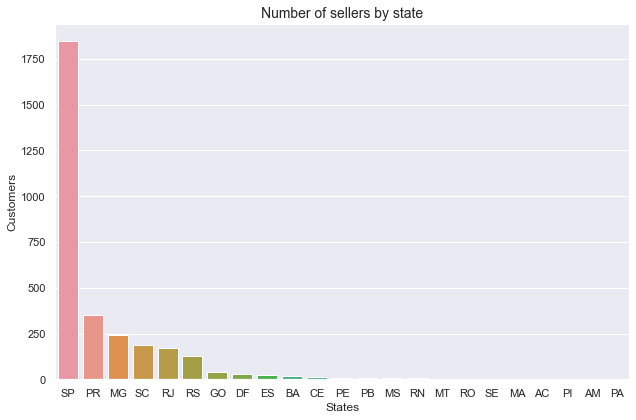

In [54]:
fig = plt.subplots(figsize=(9, 6))
plot = sns.barplot(x=df_sellers["seller_state"].value_counts().index, y=df_sellers["seller_state"].value_counts(), data=df_sellers)
plt.xlabel("States", size=12)
plt.ylabel("Customers", size=12)
plt.title("Number of sellers by state", size=14)
plt.tight_layout()
plt.savefig("images/number-of-sellers-by-state.png")
plt.show()

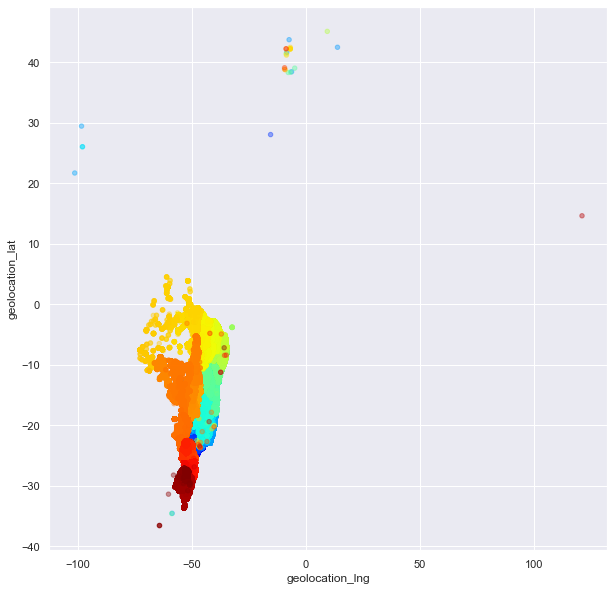

In [55]:
df_geolocation.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap=plt.get_cmap("jet"), colorbar=False, figsize=(10, 10))
plt.show()

In [56]:
# Removing some outliers

# Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude
df_geolocation = df_geolocation[df_geolocation.geolocation_lat <= 5.27438888]
# it’s most Western spot is at 73 deg, 58′ 58.19″W Long
df_geolocation = df_geolocation[df_geolocation.geolocation_lng >= -73.98283055]
# It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude
df_geolocation = df_geolocation[df_geolocation.geolocation_lat >= -33.75116944]
# It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
df_geolocation = df_geolocation[df_geolocation.geolocation_lng <= -34.79314722]

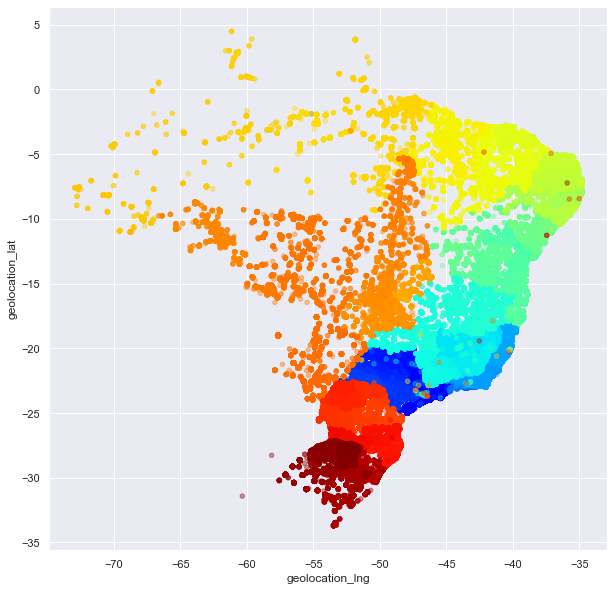

In [57]:
df_geolocation.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap=plt.get_cmap("jet"), colorbar=False, figsize=(10, 10))
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Dataset with geolocation data. There is not a clear relation among this dataset and Customers and Sellers dataset.<br>It is possible to consider only the city, state and zip code</p>
    <ul>
        <li>There is not a pk</li>
        <li>There are missing-values</li>
    </ul>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Joining datasets</h2>
</div>

<div class="alert alert-block alert-info">
    <p>We are only going to keep one geolocation for each zip code to mix them with customers and sellers</p>
</div>

In [104]:
df_geolocation.drop_duplicates(subset=["geolocation_zip_code_prefix"], keep="first", inplace=True)

<div class="alert alert-block alert-info">
    <p>Merging geolocation with customers</p>
</div>

In [107]:
df_temp_customers = df_customers.merge(right=df_geolocation[["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"]], 
                                      right_on="geolocation_zip_code_prefix", left_on="customer_zip_code_prefix", how="left")

df_temp_customers["customer_geolocation_lat"] = df_temp_customers["geolocation_lat"]
df_temp_customers["customer_geolocation_lng"] = df_temp_customers["geolocation_lng"]

df_temp_customers.drop(columns=["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"], axis=1, inplace=True)

In [108]:
df_analysis(df_temp_customers, "data", type_analysis="complete")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  99441 rows and 7 columns
- Total of NaN values:            558
- Percentage of NaN:              0.08 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 6.1+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,customer_id,object,99441,99441,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,customer_unique_id,object,99441,96096,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,customer_zip_code_prefix,int64,99441,14994,0,0.00000,35137.47458,1003.00000,11347.00000,24416.00000,58900.00000,99990.00000,29797.93900
3,customer_city,object,99441,4119,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,customer_state,object,99441,27,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,customer_geolocation_lat,float64,99162,14832,279,0.28000,-21.19519,-33.69142,-23.58830,-22.92690,-20.14662,3.84490,5.59884
6,customer_geolocation_lng,float64,99162,14833,279,0.28000,-46.17745,-72.66671,-48.09738,-46.63084,-43.60445,-34.80034,4.05236


<div class="alert alert-block alert-info">
    <p>Merging geolocation with sellers</p>
</div>

In [111]:
df_temp_sellers = df_sellers.merge(right=df_geolocation[["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"]], 
                                      right_on="geolocation_zip_code_prefix", left_on="seller_zip_code_prefix", how="left")

df_temp_sellers["seller_geolocation_lat"] = df_temp_sellers["geolocation_lat"]
df_temp_sellers["seller_geolocation_lng"] = df_temp_sellers["geolocation_lng"]

df_temp_sellers.drop(columns=["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"], axis=1, inplace=True)

In [112]:
df_analysis(df_temp_sellers, "data", type_analysis="complete")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  3095 rows and 6 columns
- Total of NaN values:            14
- Percentage of NaN:              0.08 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 169.3+ KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,seller_id,object,3095,3095,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,seller_zip_code_prefix,int64,3095,2246,0,0.00000,32291.05945,1001.00000,7093.50000,14940.00000,64552.50000,99730.00000,32713.45383
2,seller_city,object,3095,611,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,seller_state,object,3095,23,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,seller_geolocation_lat,float64,3088,2239,7,0.23000,-23.04698,-32.07951,-23.65253,-23.48838,-22.27572,-2.54608,3.17600
5,seller_geolocation_lng,float64,3088,2239,7,0.23000,-47.36318,-67.80966,-49.07151,-46.79633,-46.52330,-34.84786,2.80665


<div class="alert alert-block alert-info">
    <p>Merging all datasets with <b>Orders dataset</b></p>
</div>

In [115]:
data = df_orders.merge(right=df_order_payments, on="order_id", how="left")
data = data.merge(right=df_order_reviews, on="order_id", how="left")
data = data.merge(right=df_order_items, on="order_id", how="left")
data = data.merge(right=df_products, on="product_id", how="left")
data = data.merge(right=df_temp_customers, on="customer_id", how="left")
data = data.merge(right=df_temp_sellers, on="seller_id", how="left")

In [116]:
df_analysis(data, "data", type_analysis="complete")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  119151 rows and 43 columns
- Total of NaN values:            202478
- Percentage of NaN:              3.95 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 40.0+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,order_id,object,119151,99441,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,customer_unique_id,object,119151,96096,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,customer_id,object,119151,99441,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,customer_city,object,119151,4119,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,customer_state,object,119151,27,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,review_answer_timestamp,object,119151,99010,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,review_creation_date,object,119151,637,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,review_score,int64,119151,5,0,0.00000,3.99851,1.00000,3.00000,5.00000,5.00000,5.00000,1.41253
12,review_id,object,119151,99173,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,customer_zip_code_prefix,int64,119151,14994,0,0.00000,35033.95325,1003.00000,11250.00000,24240.00000,58475.00000,99990.00000,29823.22418


In [64]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


<div class="alert alert-block alert-info">
    <p>We are going to start with <b>df_orders</b> and <b>df_customers</b></p>
</div>

In [ ]:
data = df_orders.merge(right=df_customer[["customer_id", "customer_unique_id", "customer_zip_code_prefix", "customer_city", "customer_state"]], on="customer_id", how="left")

In [ ]:
data.head()

In [ ]:
df_analysis(df_customer, "df_customer", columns=["customer_id"], type_analysis="complete")

In [ ]:
df_analysis(df_order, "df_order", columns=["order_id"], type_analysis="complete")

In [ ]:
df_orders.head()

In [ ]:
df_customer.head()

In [ ]:
df_customer.shape

In [ ]:
df_customer[~df_customer["customer_unique_id"].isin(df_orders["customer_id"])].shape

In [ ]:
df_data_copy[~df_data_copy["2-alpha code"].isin(df_countries_iso["Code"])].head(10)

In [ ]:
df_customer = pd.read_csv(r"datasets\olist_customers_dataset.csv")
df_geolocation = pd.read_csv(r"datasets\olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(r"datasets\olist_order_items_dataset.csv")
df_order_payments = pd.read_csv(r"datasets\olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv(r"datasets\olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(r"datasets\olist_orders_dataset.csv")
df_products = pd.read_csv(r"datasets\olist_products_dataset.csv")
df_sellers = pd.read_csv(r"datasets\olist_sellers_dataset.csv")
df_product_category_name_translation = pd.read_csv(r"datasets\product_category_name_translation.csv")

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

In [58]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

C:\Users\Samir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

In [ ]:
raise SystemExit("Stop right there!")

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">X. Initial analysis</h2>
</div>

In [ ]:
df_analysis(df_customers, "df_customers", columns=["customer_id"], type_analysis="complete")

In [ ]:
df_customers.head()

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">X. Joining datasets</h2>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to start with <b>df_orders</b> and <b>df_customers</b></p>
</div>

In [ ]:
data = df_order.merge(right=df_customer[["customer_id", "customer_unique_id", "customer_zip_code_prefix", "customer_city", "customer_state"]], on="customer_id", how="left")

In [ ]:
data.head()

In [ ]:
df_analysis(df_customer, "df_customer", columns=["customer_id"], type_analysis="complete")

In [ ]:
df_analysis(df_order, "df_order", columns=["order_id"], type_analysis="complete")

In [ ]:
df_orders.head()

In [ ]:
df_customer.head()

In [ ]:
df_customer.shape

In [ ]:
df_customer[~df_customer["customer_unique_id"].isin(df_orders["customer_id"])].shape

In [ ]:
df_data_copy[~df_data_copy["2-alpha code"].isin(df_countries_iso["Code"])].head(10)

In [ ]:
df_customer = pd.read_csv(r"datasets\olist_customers_dataset.csv")
df_geolocation = pd.read_csv(r"datasets\olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(r"datasets\olist_order_items_dataset.csv")
df_order_payments = pd.read_csv(r"datasets\olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv(r"datasets\olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(r"datasets\olist_orders_dataset.csv")
df_products = pd.read_csv(r"datasets\olist_products_dataset.csv")
df_sellers = pd.read_csv(r"datasets\olist_sellers_dataset.csv")
df_product_category_name_translation = pd.read_csv(r"datasets\product_category_name_translation.csv")

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

https://www.definitions-marketing.com/definition/segmentation-rfm/
https://lms.simplilearn.com/courses/4414/Introduction-to-Supervised-&-Unsupervised-Machine-Learning/syllabus

https://classroom.udacity.com/courses/st101
https://classroom.udacity.com/courses/ud827
https://www.freecodecamp.org/news/free-machine-learning-course-10-hourse/

https://towardsdatascience.com/10-highly-probable-data-scientist-interview-questions-fd83f7414760